Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link

### 1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [2]:
import pandas as pd
df=pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [37]:
#Handling missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No Null Values found in dataset

#### No Encoding is required as all dataypes are already in numerical format also random forest does not require feature scaling

### 2. Split the dataset into a training set (70%) and a test set (30%).

In [38]:
## independent and dependent features
X=df.drop(labels=['target'],axis=1)
y=df['target']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [40]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2


### 3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

### 4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [43]:
# Creating a function to evaluate model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(x,y,model):
    ypred = model.predict(x)
    acc = accuracy_score(y,ypred)
    pre = precision_score(y,ypred)
    rec = recall_score(y,ypred)
    f1 = f1_score(y,ypred)
    print(f'Accuracy Score  : {acc:.4f}')
    print(f'Precision Score : {pre:.4f}')
    print(f'Recall Score    : {rec:.4f}')
    print(f'F1 Score        : {f1:.4f}')
    return acc, pre, rec, f1

In [44]:
# Evaluate model on test data
acc_base, pre_base, rec_base, f1_base = evaluate_model(X_test, y_test, rfc)

Accuracy Score  : 0.7912
Precision Score : 0.8163
Recall Score    : 0.8000
F1 Score        : 0.8081


In [45]:
from sklearn.metrics import classification_report
ypred_test = rfc.predict(X_test)
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        41
           1       0.82      0.80      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



### 5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [46]:
rfc.feature_importances_

array([0.08549977, 0.02522963, 0.11951334, 0.06737531, 0.07517226,
       0.00853726, 0.01741198, 0.1041777 , 0.05986098, 0.10207594,
       0.06365082, 0.15789986, 0.11359515])

In [47]:
rfc.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [48]:
imp = pd.Series(rfc.feature_importances_)
imp.index = rfc.feature_names_in_
imp = imp.sort_values(ascending=False)
imp

ca          0.157900
cp          0.119513
thal        0.113595
thalach     0.104178
oldpeak     0.102076
age         0.085500
chol        0.075172
trestbps    0.067375
slope       0.063651
exang       0.059861
sex         0.025230
restecg     0.017412
fbs         0.008537
dtype: float64

In [49]:
top5 = list(imp[0:5].index)
print(f'Top 5 features in the data are : {top5}')

Top 5 features in the data are : ['ca', 'cp', 'thal', 'thalach', 'oldpeak']


<AxesSubplot: title={'center': 'Feature Importances Plot'}>

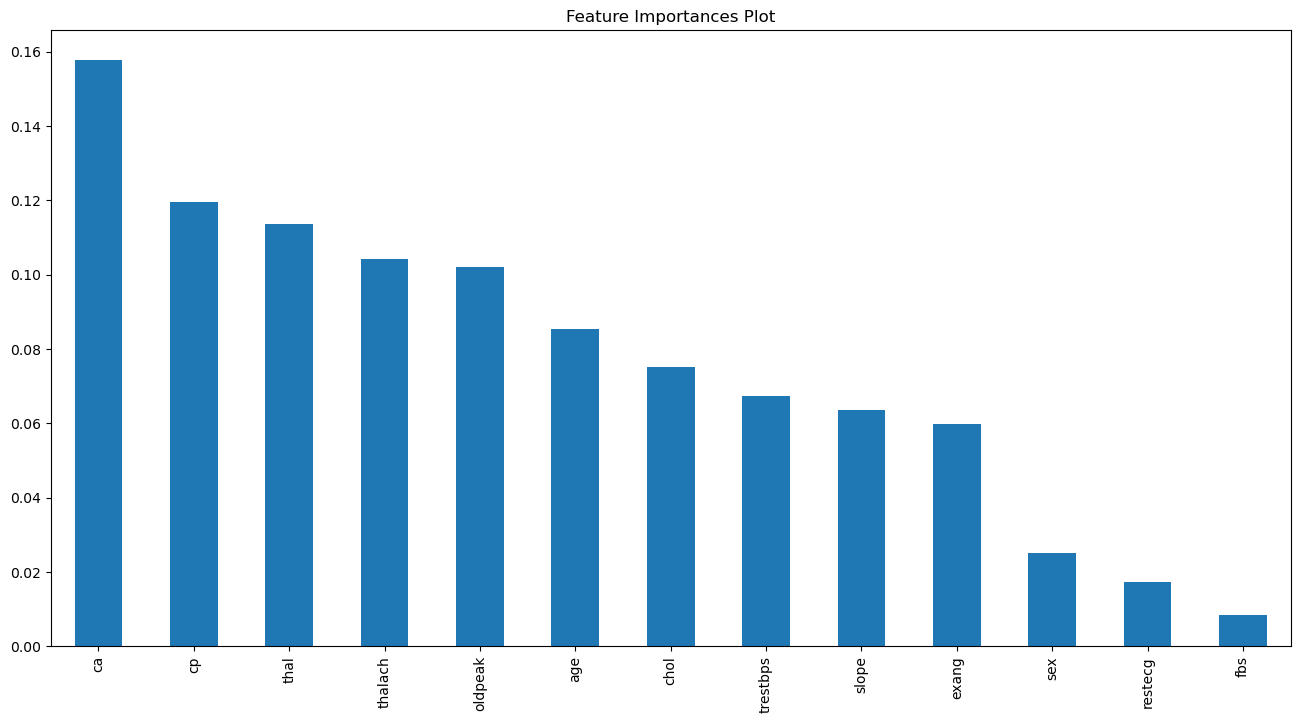

In [50]:
imp.plot(kind='bar',title='Feature Importances Plot', figsize=(16,8))

### 6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [51]:
# Defining the parameters for tuning
parameters = {
    'n_estimators':[10,50,100,200,300,400],
    'max_depth':[4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[2,5,10]
}

In [52]:
# Performing Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=parameters,
                          cv=5, 
                          scoring='f1',
                          n_iter=50,
                          verbose=3)

In [53]:
rscv.fit(X_train,y_train.values.flatten())

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10;, score=0.889 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10;, score=0.833 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10;, score=0.766 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10;, score=0.880 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10;, score=0.810 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.909 total time=   0.2s
[CV 2/5] END max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.857 total time=   0.2s
[CV 3/5] END max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.824 total time=   0.

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='f1', verbose=3)

In [54]:
rscv.best_score_

0.8631917592550942

### 7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [56]:
#Best parameters
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 5}

In [57]:
# Best Estimator (Model)
rscv.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200)

In [58]:
# Testing Accuracy on tuned model
print('Results for Tuned Model :\n')
acc_tuned, pre_tuned , rec_tuned, f1_tuned = evaluate_model(X_test,y_test.values.flatten(),rscv)

Results for Tuned Model :

Accuracy Score  : 0.8242
Precision Score : 0.8269
Recall Score    : 0.8600
F1 Score        : 0.8431


In [59]:
dct = {
    'metrics':['accuracy','precision','recall','f1'],
    'base model':[acc_base,pre_base,rec_base,f1_base],
    'tuned model':[acc_tuned,pre_tuned,rec_tuned,f1_tuned]
}

In [60]:
df_compare = pd.DataFrame(dct)
df_compare

,metrics,base model,tuned model
0,accuracy,0.791209,0.824176
1,precision,0.816327,0.826923
2,recall,0.800000,0.860000
3,f1,0.808081,0.843137


### 8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [61]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200)

In [62]:
imp_tuned = best_rfc.feature_importances_
imp_tuned = pd.Series(imp_tuned)
imp_tuned.index = best_rfc.feature_names_in_
imp_tuned = imp_tuned.sort_values(ascending=False)
imp_tuned

ca          0.191488
cp          0.139838
thal        0.137799
oldpeak     0.115937
thalach     0.099058
exang       0.095914
slope       0.062426
age         0.049595
trestbps    0.034501
chol        0.033878
sex         0.027517
restecg     0.009771
fbs         0.002278
dtype: float64

In [63]:
imp_tuned[0:2]

ca    0.191488
cp    0.139838
dtype: float64

<AxesSubplot: title={'center': 'Feature Importances for tuned model'}>

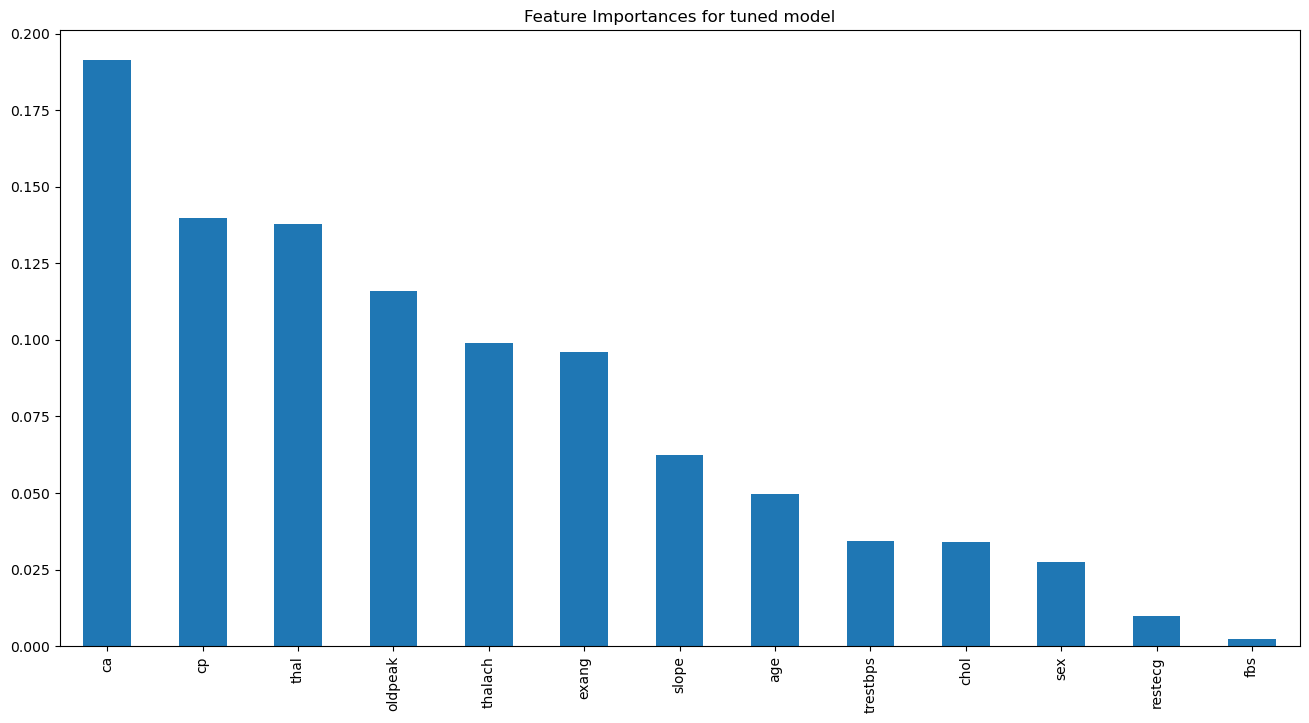

In [64]:
imp_tuned.plot(kind='bar',title='Feature Importances for tuned model',figsize=(16,8))

In [66]:
top2 = X_train[['ca','cp']]
top2.head()

,ca,cp
124,0,2
72,0,1
15,0,2
10,0,0
163,4,2


In [67]:
df_top2 =pd.concat([top2,y_train],axis=1)
df_top2.head()

,ca,cp,target
124,0,2,1
72,0,1,1
15,0,2,1
10,0,0,1
163,4,2,1


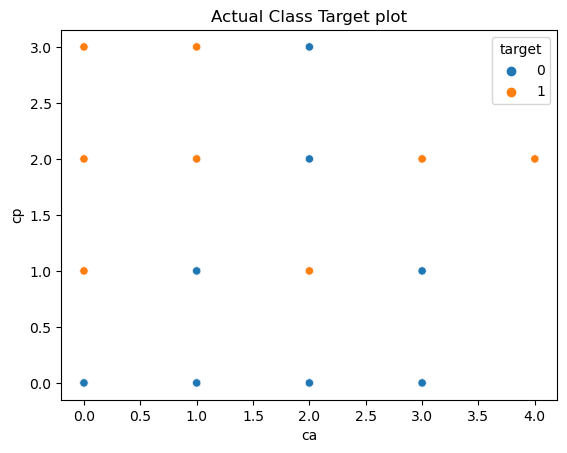

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='target')
plt.title('Actual Class Target plot')
plt.show()

In [70]:
df_top2['predicted'] = best_rfc.predict(X_train)

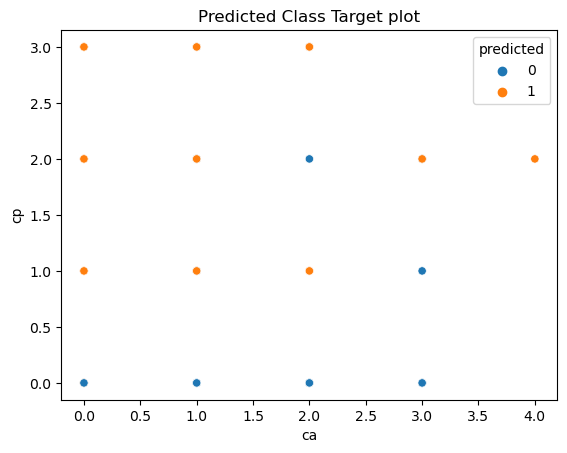

In [71]:
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='predicted')
plt.title('Predicted Class Target plot')
plt.show()